In [1]:
import numpy as np
import pandas as pd 
import mysql.connector as conn
import seaborn as sns
import matplotlib.pyplot as plt

# List all unique cities where customers are located.

In [2]:

# Connect to the database
db =conn.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce'
)

# Create a cursor object
cur = db.cursor()

# Define the query
query = """SELECT DISTINCT customer_city FROM customers"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [3]:
query = """SELECT count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()
print("total orders placed in 2017 are ",data[0][0])

total orders placed in 2017 are  45101


# Find the total sales per category.

In [4]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()
df=pd.DataFrame(data ,columns=['category','sales'])
df

,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [5]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()

print("the percentage of orders that were paid in installments is", data[0][0])

the percentage of orders that were paid in installments is 99.9981


# Count the number of customers from each state. 


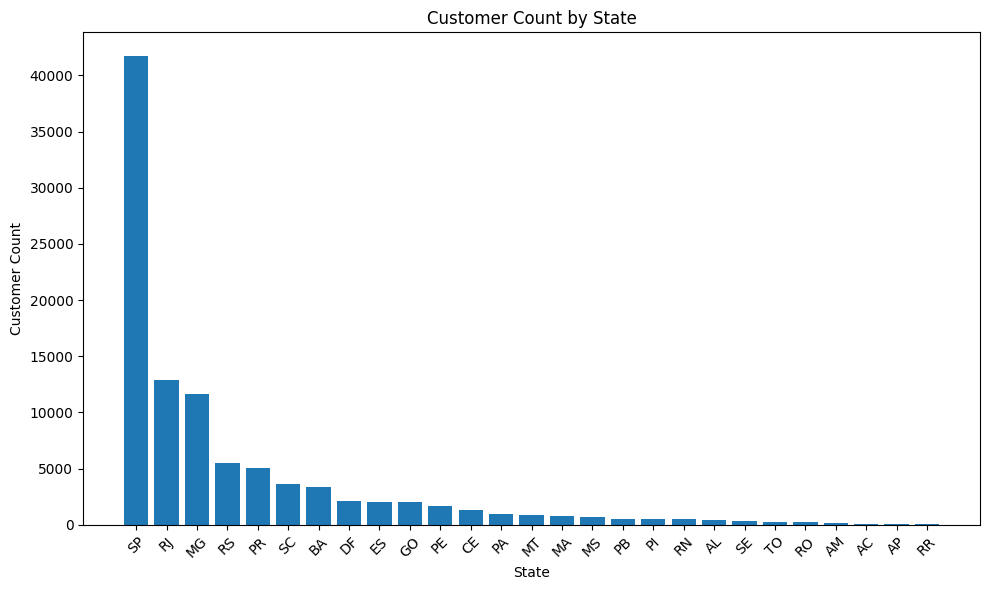

In [6]:
query = """ select customer_state,count(customer_state) 
from ecommerce.customers
group by customer_state
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["State","Count"])
df = df.sort_values(by="Count", ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df["State"], df["Count"])
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Customer Count by State')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()

# Calculate the number of orders per month in 2018.

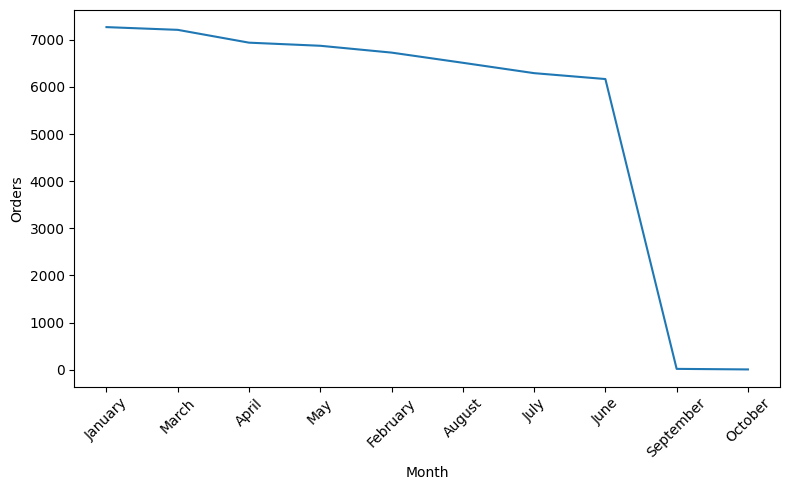

In [13]:
query = """
    SELECT MONTHNAME(order_purchase_timestamp) purchase_month, COUNT(order_id) order_count
    FROM orders
    WHERE YEAR(order_purchase_timestamp) = 2018
    GROUP BY purchase_month
    """


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Month", "Orders"])
df = df.sort_values(by="Orders", ascending=False)
plt.figure(figsize=(8, 5))
ax = sns.lineplot(x="Month", y="Orders", data=df)

plt.xticks(rotation=45)
plt.tight_layout()
#ax.bar_label(ax.containers[0])

# Show plot
plt.show()

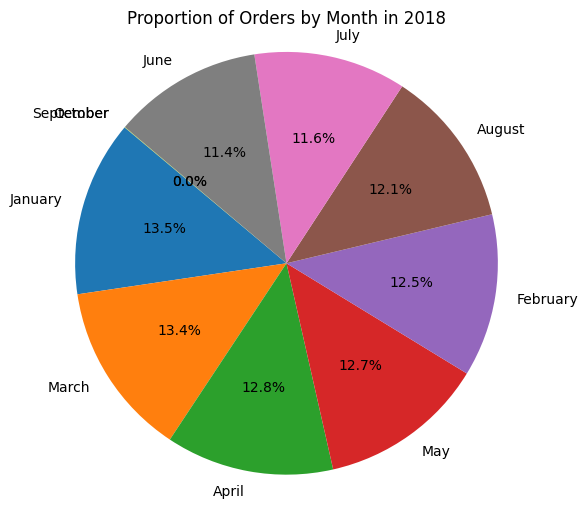

In [8]:
query = """
    SELECT MONTHNAME(order_purchase_timestamp) AS purchase_month, COUNT(order_id) AS order_count
    FROM orders
    WHERE YEAR(order_purchase_timestamp) = 2018
    GROUP BY purchase_month
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Create DataFrame
df = pd.DataFrame(data, columns=["Month", "Orders"])

# Sort DataFrame by number of orders in descending order
df = df.sort_values(by="Orders", ascending=False)

# Set figure size
plt.figure(figsize=(6, 6))

# Create pie chart
plt.pie(df["Orders"], labels=df["Month"], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title("Proportion of Orders by Month in 2018")

# Show plot
plt.show()

# Find the average number of products per order, grouped by customer city.

In [9]:
query = """
    with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()
data

[('padre carvalho', Decimal('7.00')),
 ('celso ramos', Decimal('6.50')),
 ('datas', Decimal('6.00')),
 ('candido godoi', Decimal('6.00')),
 ('matias olimpio', Decimal('5.00')),
 ('cidelandia', Decimal('4.00')),
 ('picarra', Decimal('4.00')),
 ('morro de sao paulo', Decimal('4.00')),
 ('teixeira soares', Decimal('4.00')),
 ('curralinho', Decimal('4.00')),
 ('inconfidentes', Decimal('3.50')),
 ('ipua', Decimal('3.25')),
 ('alto paraiso de goias', Decimal('3.00')),
 ('nova esperanca do sul', Decimal('3.00')),
 ('capela', Decimal('3.00')),
 ('ouvidor', Decimal('3.00')),
 ('pacuja', Decimal('3.00')),
 ('brasileia', Decimal('3.00')),
 ('ubata', Decimal('3.00')),
 ('pedregulho', Decimal('3.00')),
 ('jose boiteux', Decimal('3.00')),
 ('chapadao do lageado', Decimal('3.00')),
 ('buriti', Decimal('3.00')),
 ('ubajara', Decimal('2.67')),
 ('colonia castrolanda', Decimal('2.67')),
 ('maracana', Decimal('2.50')),
 ('sao miguel dos campos', Decimal('2.50')),
 ('colonia jordaozinho', Decimal('2.50'))

# Calculate the percentage of total revenue contributed by each product category.

In [10]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2)
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

# Execute the query
cur.execute(query)

# Fetch the data
data = cur.fetchall()
df=pd.DataFrame(data ,columns=['category','percentage distribution'])
df

,category,percentage distribution
0,PERFUMERY,3.17
1,FURNITURE DECORATION,8.93
2,TELEPHONY,3.04
3,BED TABLE BATH,10.70
4,AUTOMOTIVE,5.32
...,...,...
69,CDS MUSIC DVDS,0.01
70,LA CUISINE,0.02
71,FASHION CHILDREN'S CLOTHING,0.00
72,PC GAMER,0.01


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])
arr1=df['order_count']
arr2=df['price']
corr = np.corrcoef(arr1,arr2)[0][1]
print("The correlation between order count and price is ",corr)

The correlation between order count and price is  -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

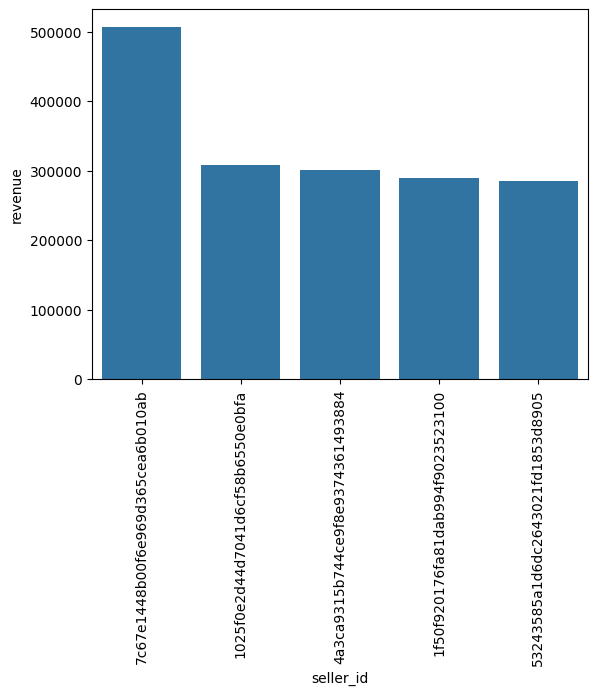

In [14]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

## Advance queries

# Calculate the moving average of order values for each customer over their order history.

In [19]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["customer id", "purchase timestamp","price","moving average"])
df

,customer id,purchase timestamp,price,moving average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

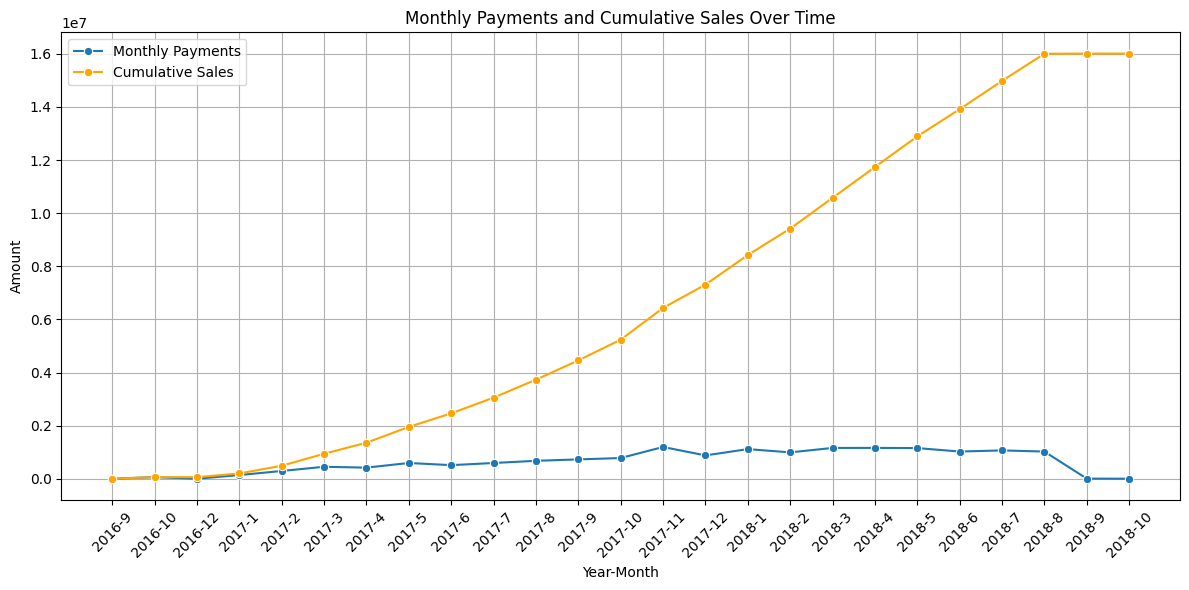

In [26]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Year","Month","Payments","Cumilative average"])
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month', y='Payments', data=df, marker='o', label='Monthly Payments')
sns.lineplot(x='Year-Month', y='Cumilative average', data=df, marker='o', color='orange', label='Cumulative Sales')
plt.title('Monthly Payments and Cumulative Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)

plt.legend()


plt.tight_layout()
plt.show()

# Calculate the year-over-year growth rate of total sales.

In [32]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years", "year over year % growth"])
df

,years,year over year % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

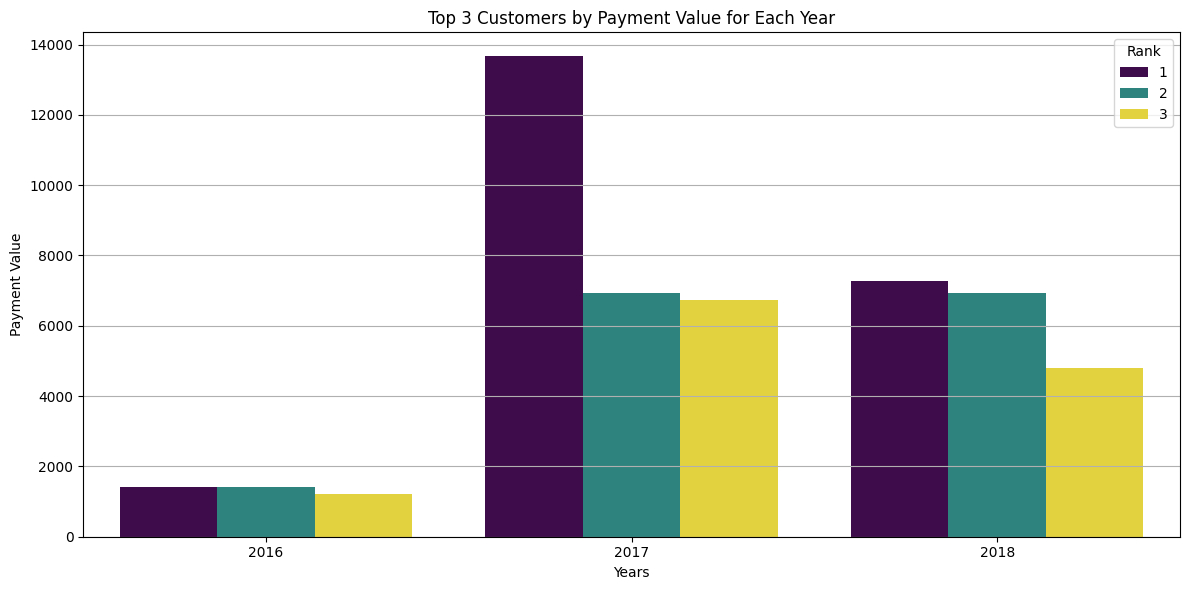

,years,id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


In [39]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])

plt.figure(figsize=(12, 6))

sns.barplot(x='years', y='payment', hue='rank', data=df, palette='viridis')

plt.title('Top 3 Customers by Payment Value for Each Year')
plt.xlabel('Years')
plt.ylabel('Payment Value')
plt.grid(axis='y')

plt.legend(title='Rank')

plt.tight_layout()
plt.show()

df